In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [29]:
#ahol bontott modell van, ott átlagolva nézzük

names = ["Simple 5 grade model", "'By department' 5 grade model (mean)", "Simple 3 group model",
        "'By department' 3 group model (mean)"]
mahals = [0.53, (0.42+0.28)/2, 0.79, (0.76+0.72)/2]              #knn mahal (tadzsmahal)
euc = [0.59, (0.53+0.36)/2, 0.8, (0.83+0.76)/2]                  #euclidean
svm = [0.39, (0.56+0.32)/2, 0.62, (0.83+0.68)/2]                 #SVM
logreg = [0.49, (0.44+0.12)/2, 0.74, (0.75+0.76)/2]              #Logistic regression
bayes = [0.43, (0.58+0.32)/2, 0.71, (0.83+0.72)/2]               #Naive Bayes
lin_acc = [0.33, (0.22+0.32)/2, 0.68, (0.75+0.72)/2]             #Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

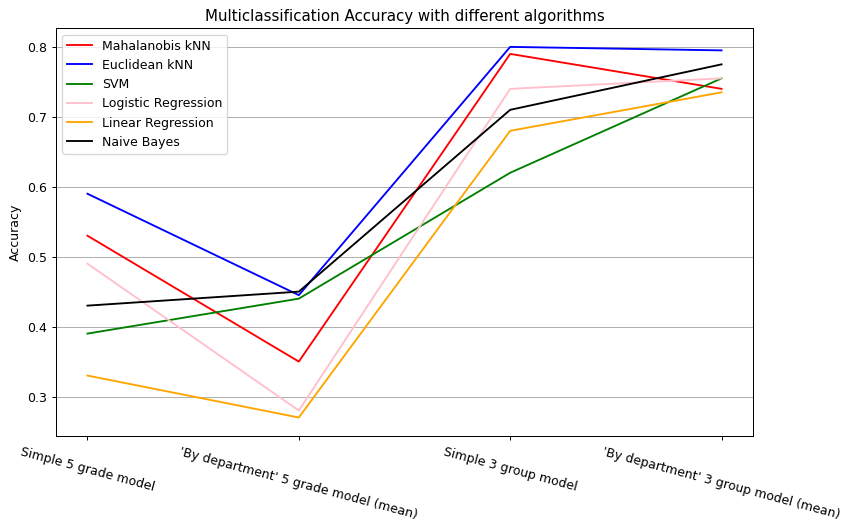

In [98]:
figure(figsize=(10, 6), dpi=90)
plt.plot(names, mahals, c="red", label = "Mahalanobis kNN")
plt.plot(names, euc, c= "blue", label = "Euclidean kNN")
plt.plot(names, svm, c= "green", label = "SVM")
plt.plot(names, logreg, c= "pink", label = "Logistic Regression")
plt.plot(names, lin_acc, c= "orange", label = "Linear Regression")
plt.plot(names, bayes, c= "black", label = "Naive Bayes")
plt.xticks(rotation=-15)
plt.legend(loc = "upper left")
plt.ylabel("Accuracy")
plt.title("Multiclassification Accuracy with different algorithms")
plt.grid(which='major', axis = 'y')
plt.show

In [49]:
#most nézzük modellenként döntött bar chart-tal növekvő sorba rendezve

algo_names = ["Mahalanobis kNN", "Euclidean kNN", "SVM", "Logistic Regression", "Linear Regression", "Naive Bayes"]
egybe = zip(mahals, euc, svm, logreg, lin_acc, bayes)
egybe = list(egybe)
együtt_ötös = egybe[0]
külön_ötös = egybe[1]
együtt_hármas = egybe[2]
külön_hármas = egybe[3]

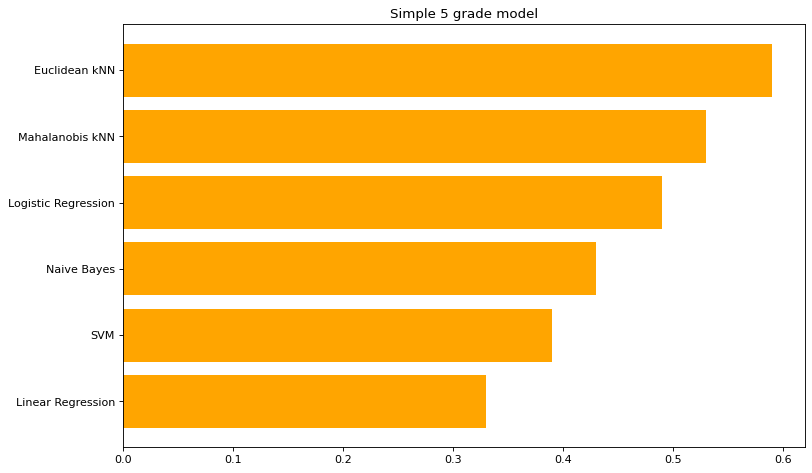

In [81]:
#először sort-oljuk, mert növekvő sorrendben akarjuk
elso = zip(algo_names, együtt_ötös)
elso = list(elso)
elso.sort(key=lambda x: x[1])

figure(figsize=(11, 7), dpi=80)
plt.barh([elso[i][0] for i in range(6)] , [elso[i][1] for i in range(6)], color="orange")
plt.title("Simple 5 grade model")
plt.show()

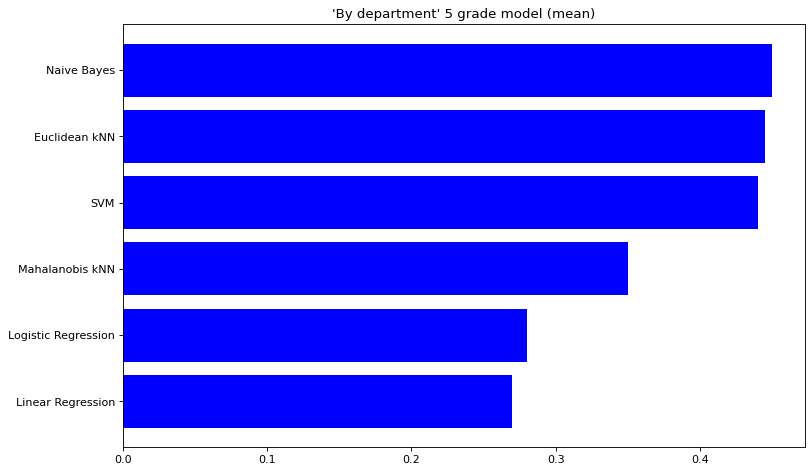

In [82]:
#és most a többire
ketto = zip(algo_names, külön_ötös)
ketto = list(ketto)
ketto.sort(key=lambda x: x[1])

figure(figsize=(11, 7), dpi=80)
plt.barh([ketto[i][0] for i in range(6)] , [ketto[i][1] for i in range(6)], color="blue")
plt.title("'By department' 5 grade model (mean)")
plt.show()

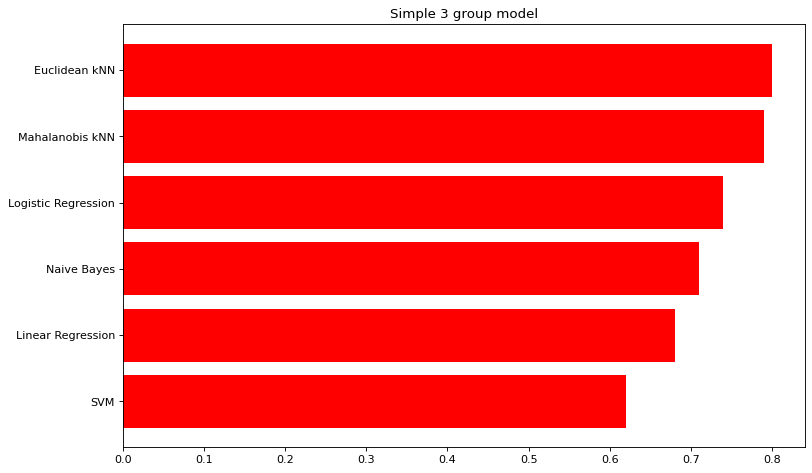

In [83]:
harom = zip(algo_names, együtt_hármas)
harom = list(harom)
harom.sort(key=lambda x: x[1])

figure(figsize=(11, 7), dpi=80)
plt.barh([harom[i][0] for i in range(6)] , [harom[i][1] for i in range(6)], color="red")
plt.title("Simple 3 group model")
plt.show()

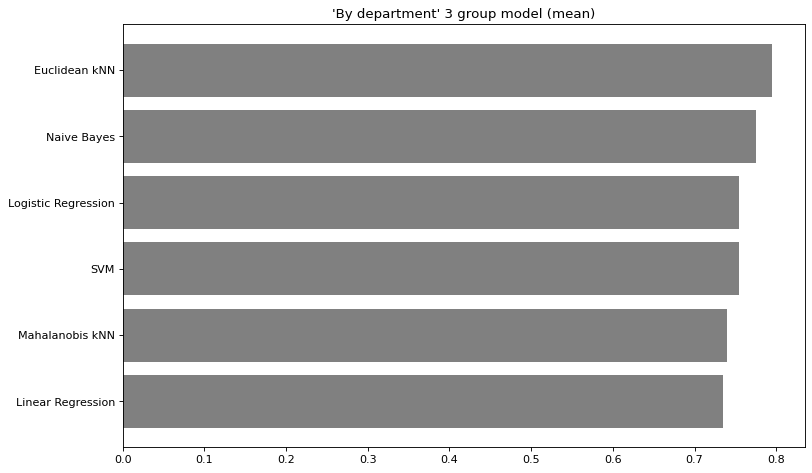

In [84]:
#és most a többire
negy = zip(algo_names, külön_hármas)
negy = list(negy)
negy.sort(key=lambda x: x[1])

figure(figsize=(11, 7), dpi=80)
plt.barh([negy[i][0] for i in range(6)] , [negy[i][1] for i in range(6)], color="grey")
plt.title("'By department' 3 group model (mean)")
plt.show()

In [96]:
#és most egyben sorba rendezve, de ezt majd R-ben, szóval exportáljuk dataframe-ként
import pandas as pd
algorithms = [f'Mahalanobis kNN {i}. Model'  for i in range(1,5)]+[f"Euclidean kNN {i}. Model" for i in range(1,5)]+[f"SVM {i}. Model" for i in range(1,5)]+[f"Logistic Regression {i}. Model" for i in range(1,5)]+[f"Naive Bayes {i}. Model" for i in range(1,5)]+[f"Linear Regression {i}. Model" for i in range(1,5)] 
végső = pd.DataFrame({"Accuracy": mahals+euc+svm+logreg+bayes+lin_acc, "Algorithm": algorithms, "Model":6*names})
végső = végső.sort_values(by="Accuracy", ascending = False)

végső.to_csv("C:/Users/Donát/Documents/GitHub/-nkutfel/2019_visual.csv")

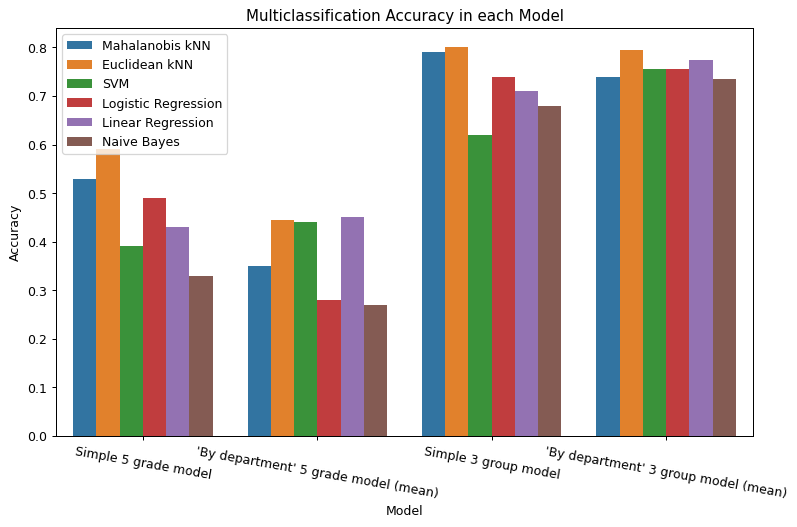

In [109]:
import seaborn as sns
figure(figsize=(10, 6), dpi=90)

df1=pd.DataFrame({'Accuracy':mahals,'Model':names})
df2=pd.DataFrame({'Accuracy':euc,'Model':names})
df3=pd.DataFrame({'Accuracy':svm,'Model':names})
df4=pd.DataFrame({'Accuracy':logreg,'Model':names})
df5=pd.DataFrame({'Accuracy':bayes,'Model':names})
df6=pd.DataFrame({'Accuracy':lin_acc,'Model':names})
df1['hue'], df2['hue'], df3['hue'], df4['hue'], df5['hue'], df6['hue'] = "Mahalanobis kNN", "Euclidean kNN", "SVM", "Logistic Regression", "Linear Regression", "Naive Bayes"
data=pd.concat([df1,df2, df3, df4, df5 ,df6])
sns.barplot(x='Model',y='Accuracy',data=data,hue='hue')
plt.xticks(rotation=-10)
plt.title("Multiclassification Accuracy in each Model")
plt.legend(loc = 0)
plt.show()